# 1. Installing libraries and importing dataframe from submission part 1

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/danielmccormick/Desktop/CareerFoundry/Python/08-23 Instacart Basket Analysis'

In [3]:
df_instacart = pd.read_pickle(os.path.join(path, 'IC_Data', 'IC_prepared_data', 'instacart_total_data'))

In [4]:
df_instacart.dtypes

user_id                        object
user_gender                    object
user_state                     object
user_age                        int64
user_date_joined               object
user_num_dependents             int64
user_marriage_stat             object
user_income                     int64
order_id                        int64
user_order_count                int64
orders_day_of_week              int64
order_hour_of_day               int64
days_since_prior_order        float64
product_id                      int64
add_to_cart_order               int64
reordered                       int64
product_name                   object
aisle_id                        int64
department_id                   int64
prices                        float64
price_range_loc                object
busiest_day                    object
busiest_days                   object
busiest_period_of_day          object
max_order                       int64
loyalty_flag                   object
user_avg_pri

# 2. Creating all of the example visualizations from the reading

<Axes: >

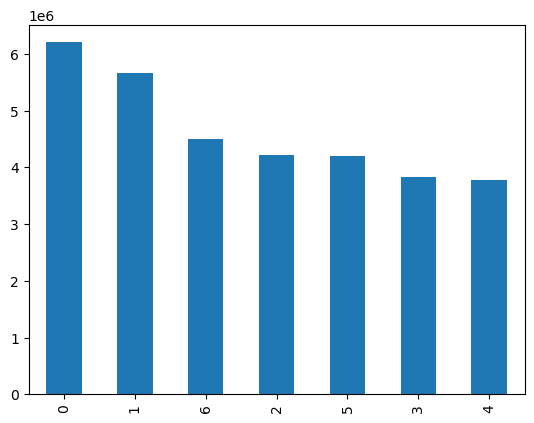

In [5]:
# Bar chart with and without sort_index. Results are in order from most to least, and then in sequential order
df_instacart['orders_day_of_week'].value_counts().plot.bar()

<Axes: >

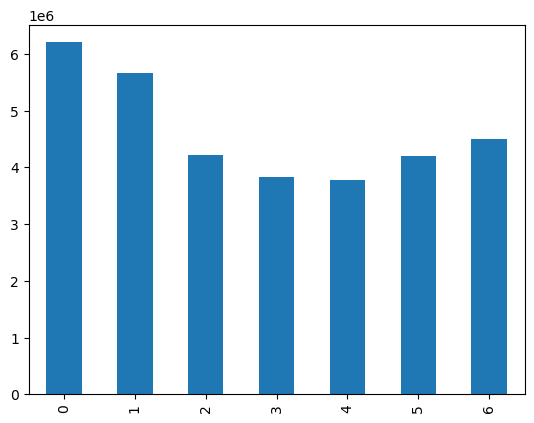

In [6]:
df_instacart['orders_day_of_week'].value_counts().sort_index().plot.bar()

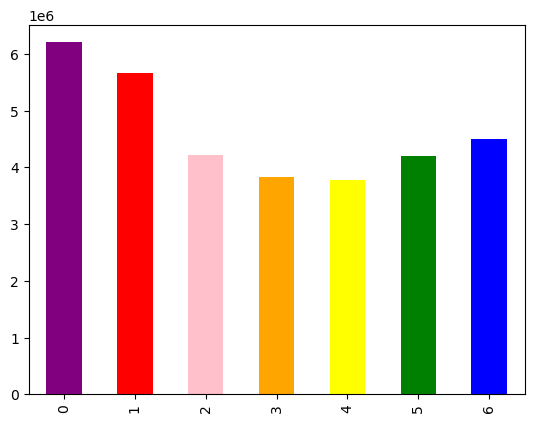

In [7]:
# Bar chart with colors assigned to each day of the week 
bar = df_instacart['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple','red','pink','orange','yellow','green','blue'])

In [8]:
# Exporting the bar chart with colors for each day of the week to the prepared data folder 
bar.figure.savefig(os.path.join(path, 'IC_Analysis', 'IC_visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

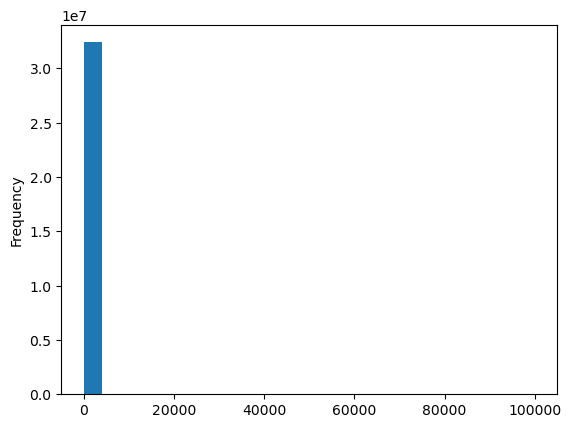

In [9]:
# Creating a histogram of the frequency of different prices 
df_instacart['prices'].plot.hist(bins = 25)

In [10]:
# resulting histogram is skewed because of significant outliers within the data set 
df_instacart['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [11]:
df_instacart['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

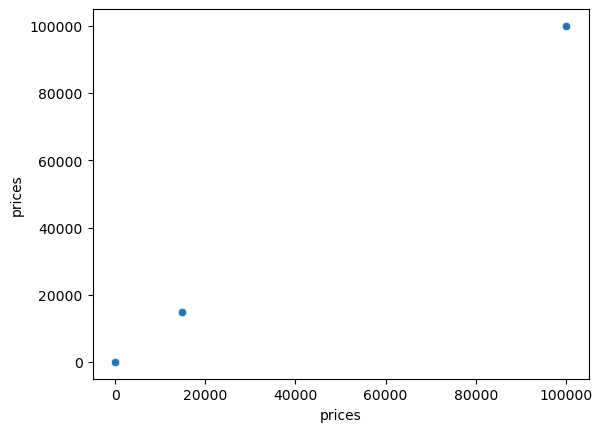

In [12]:
# There is clearly a few rows with a price of $99k in the data set which is skewing out visualizations. 
# we can get further clarity on these outliers by creating a scatter plot of prices on both the x and y axes 

sns.scatterplot(x = 'prices',y = 'prices', data = df_instacart)

In [13]:
# it is clear from the scatterplot that there is a cluster of data points just below $20k and right around $100k 

In [14]:
df_outliers = df_instacart[df_instacart['prices'] > 100]

In [15]:
df_outliers

,user_id,user_gender,user_state,user_age,user_date_joined,user_num_dependents,user_marriage_stat,user_income,order_id,user_order_count,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_flag,user_med_days_since_order,frequency_flag,_merge
5547,117740,Female,Oregon,55,1/1/2017,1,married,292759,3369785,30,...,Regularly busy,Busier Days,Most Orders,84,Loyal Customer,36.928431,High Spender,4.0,Frequent customer,both
10303,31590,Female,Montana,46,1/1/2017,0,single,154076,830157,13,...,Regularly busy,Busier Days,Average Orders,38,Regular Customer,58.139865,High Spender,8.0,Frequent customer,both
27945,100958,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,2732823,1,...,Regularly busy,Normal Busyness Days,Average Orders,5,New Customer,627.991667,High Spender,11.0,Regular customer,both
27946,100958,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,2471612,2,...,Busiest day,Busier Days,Average Orders,5,New Customer,627.991667,High Spender,11.0,Regular customer,both
27947,100958,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,2829915,3,...,Busiest day,Busier Days,Average Orders,5,New Customer,627.991667,High Spender,11.0,Regular customer,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32390922,5519,Female,Georgia,78,4/1/2020,3,married,262610,288789,46,...,Regularly busy,Less Busy Days,Average Orders,53,Loyal Customer,69.638604,High Spender,7.0,Frequent customer,both
32390923,5519,Female,Georgia,78,4/1/2020,3,married,262610,1615768,48,...,Regularly busy,Normal Busyness Days,Average Orders,53,Loyal Customer,69.638604,High Spender,7.0,Frequent customer,both
32390924,5519,Female,Georgia,78,4/1/2020,3,married,262610,1744232,51,...,Regularly busy,Normal Busyness Days,Average Orders,53,Loyal Customer,69.638604,High Spender,7.0,Frequent customer,both
32396990,140589,Male,Maryland,26,4/1/2020,0,single,154845,1244840,6,...,Regularly busy,Normal Busyness Days,Average Orders,9,New Customer,876.974783,High Spender,20.0,Regular customer,both


In [16]:
# based on the results of df_outliers, we have 5127 rows with prices over $100. These outliers are skewing
# our visualizations
# we will manually replace the price value for all rows with outliers with NaN so that it no longer skews our 
# visualizations

In [17]:
df_instacart.loc[df_instacart['prices']>100,'prices'] = np.nan

In [18]:
df_instacart['prices'].max()

25.0

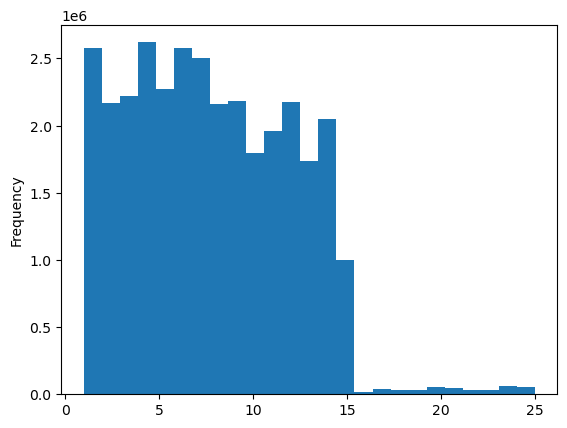

In [19]:
# Now we can create the histogram of frequency of different prices with 25 bins 
hist = df_instacart['prices'].plot.hist(bins = 25)

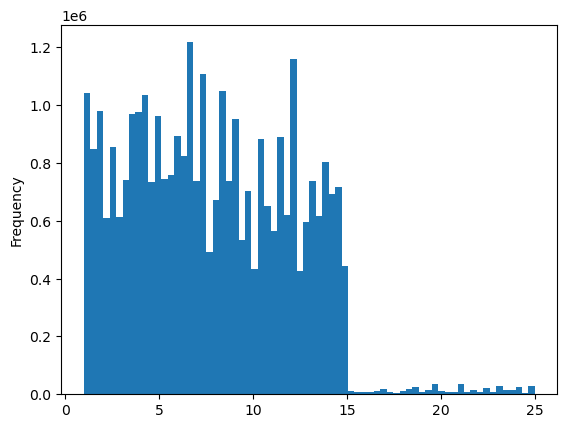

In [20]:
# we can also plot another histogram with more buckets to break up the data into more groups of frequency
hist_2 = df_instacart['prices'].plot.hist(bins = 70)

In [21]:
# exporting the two histogram visualizations 
hist.figure.savefig(os.path.join(path, 'IC_Analysis', 'IC_visualizations', 'hist_prices.png'))

In [ ]:
hist_2.figure.savefig(os.path.join(path,'IC_Analysis', 'IC_visualizations', 'hist2_prices.png'))

In [ ]:
# If we want to create a line chart for the development of the "prices" column across the days of the week
# we would need to create a sample of the data set. But, we could not just take the first 2M rows (df = df_instacart[:2000000])
# because we would not be getting a true representation of the full data set that way

In [ ]:
# Determining the length of the total dataframe
len(df_instacart)

In [ ]:
# setting the "seed" at 4 so that the randomly generate values used to create the sample remain consistent 
np.random.seed(4)

In [ ]:
# Next we will create a list of boolean values "dev" that will be used for splitting our values into two groups, 
# one with 70% of the rows, one with 30%. 
# We will use np.random.rand() to generate a random list of values. The .rand() portion at the end specifies that 
# we want the values to be uniformly distributed 
# We will use len() on the entire dataframe to communicate to the function how many random values we want to generate
# We will then compare the list of random values that has as many values as the dataframe has rows to 0.7 and assign
# the boolean values of that comparison to the "dev" list 
# In that way we will have a randomly generated list of boolean values the same length as rows in the dataframe, 
# with 70% as "True" and 30% as "False"

In [ ]:
dev = np.random.rand(len(df_instacart)) <= 0.7

In [ ]:
# Next we will use our list of boolean values to split the dataframe into two groups "big" and "small"
# Big will be the rows from the dataframe that correspond to values of "true" in the dev boolean list
# Small will be rows from the datframe that correspond to values of Not "true" (aka false) from the dev boolean list 

In [ ]:
big = df_instacart[dev]

In [ ]:
small = df_instacart[~dev]

In [ ]:
# Since we had a uniform distribution of values in the random list, and we compared those values to a value of 0.7
# we should have 70% values of True (and thus 70% of the rows assigned to "big") and 30% values of False (and thus
# 30% of values assigned to "small")

In [ ]:
# We want to test to make sure that big is 70% of the total and small is 30%. Perform len on each and then len 
# on both to confirm this and that the total is equal to the length of df_instacart

In [ ]:
len(big)

In [ ]:
len(small)

In [ ]:
len(big)+len(small)

In [ ]:
# Using our "small" sample of 30% of the total dataframe we will trim that down further to the only two columns we need
# for the line chart, the "orders day of the week" and "prices"
df_2 = small[['orders_day_of_week','prices']]

In [ ]:
# Using the df_2 subset of the "small" data sample to create a line chart with order day of the week on the x-axis
# and price on the Y-axis. It shows that prices paid for items are highest on day 0 and 6, Sunday and Saturday. 
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y= 'prices')

In [ ]:
# Exporting the line chart from above out of the Jupyter notebook. 
line.figure.savefig(os.path.join(path,'IC_Analysis', 'IC_visualizations', 'line_dow_prices.png'))

# 3. Creating a histogram ont the "order_hour_of_day" column

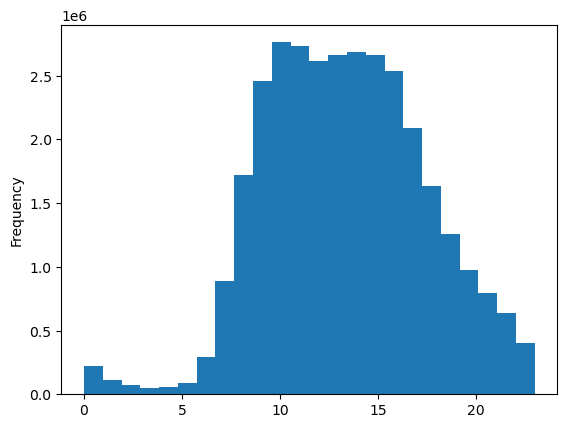

In [9]:
# 3. Creating a histogram on the "order_hour_of_day" column for marketing
hist_3 = df_instacart['order_hour_of_day'].plot.hist(bins = 24)

In [ ]:
# The Histogram is not quite normally distributed, but it does have a rough normal distribution shape to it. 
# the hours of the day that see the highest frequency of orders are clustered roughly in the middle of the 24 
# hour day from 9am-3pm. This means the highest amount of orders are occurring during lunch time each day.  
# The frequency of orders does decrease on either side of the middle hours of the day like they would 
# in a normal distribution. But the decrease in frequency of orders is much more gradual for hours 
# 15-24 as compared to hours 0-8. This means that the histogram has a bit of a left skew, and let's us know that 
# the later hours of the day, around dinner time and then in the evening afterwards, see higher frequency of orders 
# than the first 8 hours of the day. This makes sense as from around 12am-8am most people are sleeping and not ordering 
# food. 

# 4. Creating a bar chart for number of orders based on loyalty flag

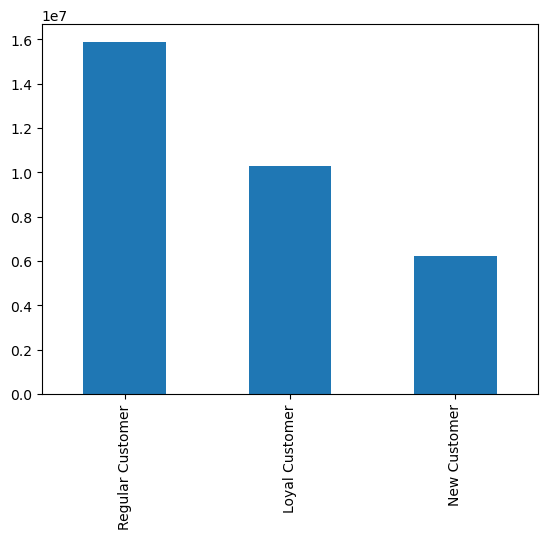

In [4]:
loyalty_bar = df_instacart['loyalty_flag'].value_counts().plot.bar()

# 5. Creating a line chart of the relationship between expenditure (prices) and the hour of the day for the order with a subset of the data

In [45]:
# Creating a line chart of the relationship between expenditure (prices) and the hour of the day for the order 
# First we will be creating an accurate subset of the total data set, with 70% of the data randomly assigned to a 
# "big" dataframe, and 30% assigned to a "small" dataframe. 

In [10]:
np.random.seed(4)

In [11]:
len(df_instacart)

32404859

In [12]:
boolean_list = np.random.rand(len(df_instacart)) <= 0.7

In [13]:
len(boolean_list)

32404859

In [14]:
big_subset = df_instacart[boolean_list]

In [15]:
small_subset = df_instacart[~boolean_list]

In [16]:
# Performing a check to confirm that the two dataframes have the same length in total as the main instacart dataframe
len(big_subset)+len(small_subset)

32404859

In [17]:
# creating another dataframe of just the two columns we want to plot on the line chart from the small subset data frame
df_price_hour = small_subset[['order_hour_of_day','prices']]

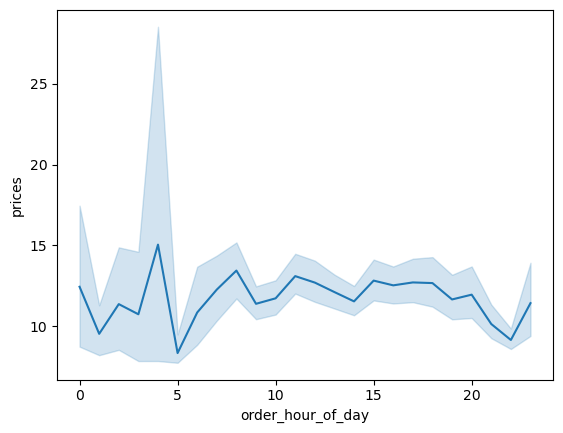

In [18]:
# plotting the order_hour_of_day and prices on a line chart 
line_price_hour = sns.lineplot(data = df_price_hour, x = 'order_hour_of_day', y = 'prices')

# 6. Line Chart that explores relationship between age and family situation

In [55]:
# Next we want to look at the relationship between age and family situation by looking at the relationship between 
# user age and the user's number of dependents. We will be creating a new dataframe from the small_subset that just
# includes the user_age and user_num_dependents columns and then plotting those values on a line chart 
df_age_dep = small_subset[['user_age', 'user_num_dependents']]

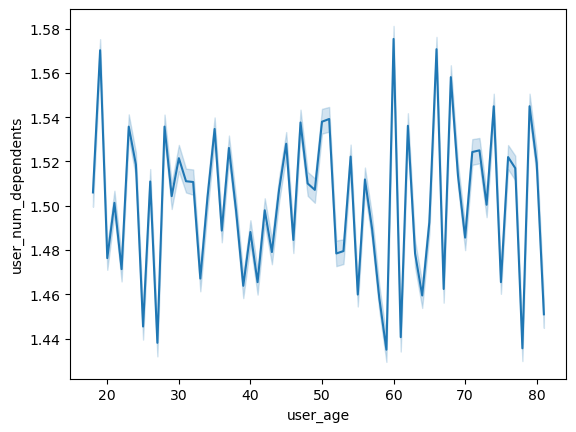

In [57]:
line_age_dep = sns.lineplot(data = df_age_dep, x = 'user_age', y = 'user_num_dependents')

In [68]:
# Based on the results of the line chart, there does not appear to be able clear relationship between age and number
# of dependents. As age increases the number of dependents both increases and decreases with no clear pattern. This 
# would inidicate to the marketing team that older customers do not necessarily have more dependents to shop for. 
# It would not make sense then to have marketing on a channel that is used mostly by older customers
# that focuses solely on using instacart to order groceries for the customer's family, for example. 

# 7. Scatterplot that explores relationship between age spending power 

In [20]:
# Next we want to look at the relationship between age and spending power. To do this we will plot user_age and 
# user_income on a line chart. We will create a dataframe from the small_subset that just includes the user_age
# and user_income columns and then plot that dataframe on a line chart. 
df_age_income = small_subset[['user_age', 'user_income']]

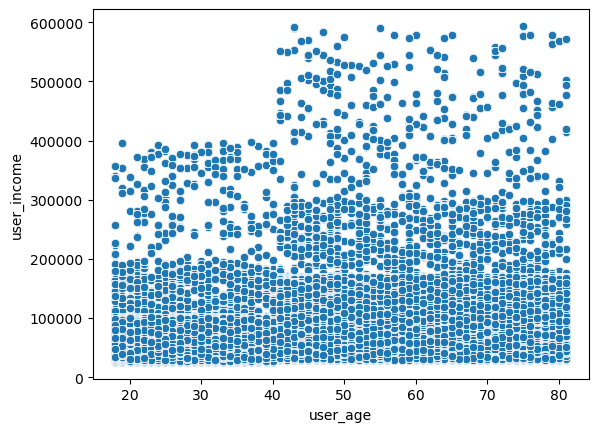

In [21]:
scatter_age_income = sns.scatterplot(data = df_age_income, x = 'user_age', y = 'user_income')

In [18]:
# Based on the results of the scatter plot it looks as though the there is a positive relationship between age 
# and income. It is not a perfect relationship, but in general it seems that as users get older there income tends
# to increase. There are a significant number of users at all ages with incomes from around $30k-$190k. 
# But once you get up to about $200k and above, there are definitely more customers in the above 40 age group than the
# under 40 with that income. Once you go above $400k, what marketing might refer to as ultra high income users, 
# there are zero customers under 40 with that income, but a decent amount of those over 40 with that income. 
# This means that older customers (over 40 years old) have significnatly more spending power than younger customers. 
# This could be used to inform marketing strategy. For example, if a marketing channel is more targeted to 
# older customers then you could focus the campaign on higher priced, luxury items. If it is a campaign on 
# a marketing channel more targeted towards younger customers, then the campagin could highlight promotions 
# and other ways that customers can gain significant value from using instacart. 

# 8. Exporting all visualizations and the updated data set

In [63]:
hist_3.figure.savefig(os.path.join(path, 'IC_Analysis', 'IC_visualizations', 'hist_hour.png'))

In [8]:
loyalty_bar.figure.savefig(os.path.join(path, 'IC_Analysis', 'IC_visualizations', 'loyalty_bar.png'))

In [65]:
line_price_hour.figure.savefig(os.path.join(path, 'IC_Analysis', 'IC_visualizations', 'price_hour_line.png'))

In [66]:
line_age_dep.figure.savefig(os.path.join(path, 'IC_Analysis', 'IC_visualizations', 'age_dep_line.png'))

In [22]:
scatter_age_income.figure.savefig(os.path.join(path, 'IC_Analysis', 'IC_visualizations', 'scatter_age.png'))

In [6]:
df_instacart.to_pickle(os.path.join(path, 'IC_Data', 'IC_prepared_data', 'instacart_total_data_v2'))